In [9]:
import pandas as pd

In [10]:
cpi = pd.read_excel("C:/Users/ilici/Documents/Jupyter/IPC 2008.xls", header = 0, parse_dates = [0])

In [11]:
cpi.tail()

,Fecha,CPI,LnCPI,CpiDif,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
155,2020-12-01,1567.074428,7.356966,0.031305,MLP,MLP,ARIMA,ARIMA,NaN,Actual,MLP,ARIMA
156,2021-01-01,1611.892756,7.385164,0.028199,1608.112323,7.382816,1609.245959,7.383521,7.382816,0.0286,0.026188,0.026911
157,2021-02-01,1651.061750,7.409174,0.024009,1656.473957,7.412446,1651.824973,7.409636,7.412446,0.0243,0.027658,0.024773
158,2021-03-01,1702.409771,7.439800,0.030626,1687.950922,7.431271,1690.142291,7.432568,7.431271,0.0311,0.022343,0.02367
159,2021-04-01,1755.524955,7.470523,0.030723,1747.985743,7.466219,1753.108891,7.469146,7.466219,0.0312,0.026771,0.029781


In [12]:
dis = 156 # dis = 156 (dic-20)
train = cpi["LnCPI"][:dis]
test = cpi["LnCPI"][dis:]

<AxesSubplot:>

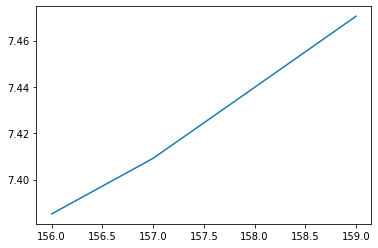

In [13]:
test.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(cpi["CpiDif"][:].dropna())[1])

p-value: 0.0009209868419297257


In [16]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order = (1,1,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  LnCPI   No. Observations:                  156
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 576.351
Date:                Tue, 15 Jun 2021   AIC                          -1144.702
Time:                        19:07:26   BIC                          -1132.528
Sample:                             0   HQIC                         -1139.758
                                - 156                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9954      0.010     99.678      0.000       0.976       1.015
ma.L1         -0.1969      0.075     -2.619      0.009      -0.344      -0.050
ma.L2         -0.3794      0.075     -5.045      0.000      -0.527      -0.232
sigma2      3.374e-05   2.76e-06     12.245      0.000    2.83e-05    3.91e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                44.68
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.80
Prob(H) (two-sided):                  0.44   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

count    155.000000
mean       0.000334
std        0.006241
min       -0.016013
25%       -0.003368
50%       -0.000170
75%        0.003394
max        0.027940
dtype: float64

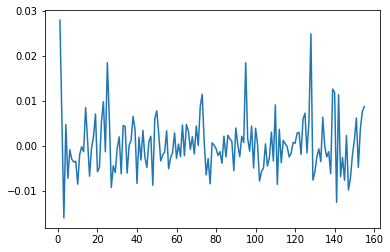

In [17]:
residuals = model_fit.resid[1:]
residuals.plot()
residuals.describe()

In [18]:
output = model_fit.get_forecast(len(test)).summary_frame()
output

LnCPI,mean,mean_se,mean_ci_lower,mean_ci_upper
156,7.383521,0.005809,7.372137,7.394905
157,7.406640,0.011953,7.383213,7.430066
158,7.429652,0.017557,7.395242,7.464063
159,7.452559,0.023263,7.406966,7.498153


<AxesSubplot:xlabel='mean_se'>

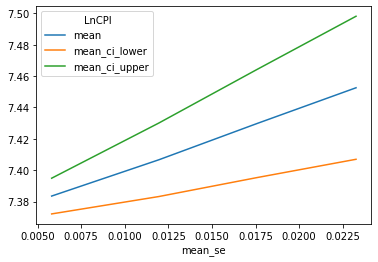

In [19]:
output.plot(1)

In [20]:
Predic = model_fit.predict()

<AxesSubplot:>

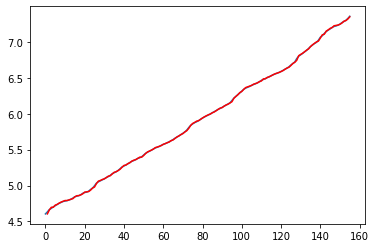

In [21]:
train.plot()
Predic[1:].plot(color="red")

In [22]:
import statsmodels as statsmodels
statsmodels.tools.eval_measures.mse(Predic, train)

0.13598466915672253

In [23]:
fore = model_fit.forecast(len(test))
fore

156    7.383521
157    7.406640
158    7.429652
159    7.452559
Name: predicted_mean, dtype: float64

In [24]:
import statsmodels as statsmodels
statsmodels.tools.eval_measures.rmse(fore, test)

0.010425885688129898

<AxesSubplot:>

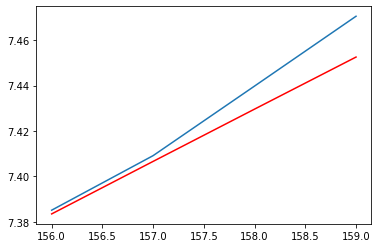

In [25]:
test.plot()
fore.plot(color="red")